#### Question 1
The assessment is to assess your ability to design NLP solutions based on the following case.

Amazon is one of the world's largest e-commerce companies, with a vast product range. It receives hundreds of thousands of product reviews daily from its users worldwide. These reviews contain valuable information about the product and customer sentiments towards it.

However, with the volume of incoming data, it's nearly impossible for Amazon to manually analyse all the reviews to extract actionable insights. This is where NLP comes in. Your task is to create an NLP solution to help Amazon structure and analyse the review data.

Here is an Amazon review dataset collected in the range of May 1996 - Oct 2018, including reviews (ratings, text, helpfulness votes), product metadata (descriptions, category information, price, brand, and image features), and links (also viewed/also bought graphs).

You are encouraged to use the smaller per-category dense subsets, which have been reduced to extract the k-core, such that each of the remaining users and items have k reviews each.

Dataset link: https://cseweb.ucsd.edu/~jmcauley/datasets/amazon_v2/

#### Question 1a
Based on your task, which is to create an NLP solution to help Amazon structure and analyse the review data, determine a scenario/problem that you are going to analyse and design NLP solution for the identified scenario/problem. (word limit: 500)

Scenario/Problem: The primary challenge is to process Amazon's vast review dataset to analyse customer sentiments regarding a specific range of products. Additionally, the task involves extracting and summarising the most common positive and negative sentiments associated with these products, which can provide actionable insights for both Amazon and its sellers to understand consumer preferences and areas for improvement.

The solution could be integrated into Amazon's backend systems to automatically analyse new customers' comments and update insights on product pages by sorting the most relevant reviews at the top of the review section. This would not only help consumers make more informed purchasing decisions based on summarised insights but also assist sellers in optimising their product offerings based on consumer feedback.

By focusing on product feature sentiment analysis and insight extraction, this NLP solution addresses the need for scalable, automated processing of consumer reviews, providing valuable insights into customer preferences and enhancing the overall e-commerce experience.

The workflow of the NLP solution would begin with data preprocessing, followed by sentiment analysis to determine the emotion behind the comments. Tools will then be deployed to understand the semantic meaning of the comments, initially examining the categories being discussed with a named entity recognition tool. Subsequently, understanding the topics being feedback by customers will strategise possible campaigns and improve the customer shopping experience.

#### Question 1b
Design and implement relevant NLP analysis flow to address the identified questions, which includes but is not limited to:

(i) Dataset preparation; (ii) Vocabulary building; (iii) Sentiment analysis; (iv) Named Entity Recognition; (v) Topic modeling

#### Question 1b(i)
Dataset preparation: Select one of the smaller per-category dense subsets, optionally filter some data points (at least 2000 reviews) from the selected sub-dataset to prepare a new sub-dataset to be used in this assessment. For example, you are free to filter by product, by user etc.
Explain the rationale behind the choice. Export the subset as a .csv or .json file. (word limit: 300)
Note: Discuss with your instructor of your filter choice before you start working on this project.

For the dataset preparation, I have opted to work with the 'Amazon Fashion' category, which consists of a "5-core" dataset of 3,176 reviews.  I have proceeded with the dataset without filtering out any data points to form a new sub-dataset. The rationale behind this approach is to avoid introducing any bias that could arise from selectively filtering by product or user.

The 'Amazon Fashion' category presents a rich and diverse corpus for natural language processing (NLP) analysis. Through sentiment analysis,  it helps to uncover detailed insights into customer satisfaction levels, thereby gaining a better understanding of what customers value within the fashion category. This analysis can reveal patterns and trends that are crucial for identifying areas for improvement, enhancing customer satisfaction, and ultimately driving sales.

Moreover, by categorising reviews, it enables to pinpoint the most top-selling and favoured products in the fashion category. This step is crucial for recognising what appeals most to Amazon Fashion shoppers, which can guide stock decisions and marketing strategies.

Moreover, Named Entity Recognition (NER) and Topic Modeling techniques will be incorporated after sentiment analysis being carried out. NER will be employed to extract specific entities from the text, such as brand names, product types, and attributes, which can then be used to enrich the understanding of the reviews. Identifying these entities will help in categorising the content more accurately, enhancing the detail of our insights.

Topic Modeling, on the other hand, will allow us to discover the latent topics within the reviews. This technique will enable us to group reviews into coherent topics, shedding light on what subjects customers frequently discuss or express concerns about. It provides a structured way to navigate through the vast amount of text data, identifying prevailing themes and areas of interest among customers. This could be crucial in strategising marketing campaigns, tailoring product descriptions, or even guiding product development based on customer interests and needs.



In [83]:
# Load all libraries that are required.
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.util import ngrams
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix
import gzip

In [84]:
# Read in Dataset with Local Directory
file_path = 'C:\\Users\\Chan Wen Le\\Documents\\SUSS\\AIB551 Natural Language Processing\\ECA\\AMAZON_FASHION_5.json.gz'

# Read the compressed JSON objects directly into a pandas DataFrame
with gzip.open(file_path, 'rt', encoding='utf-8') as gz_file:
    df = pd.read_json(gz_file, lines=True)

# Now df is a pandas DataFrame containing your data
print(df.head())  # Print the first few rows of the DataFrame


   overall  verified  reviewTime     reviewerID        asin  \
0        5      True  09 4, 2015  ALJ66O1Y6SLHA  B000K2PJ4K   
1        5      True  09 4, 2015  ALJ66O1Y6SLHA  B000K2PJ4K   
2        5      True  09 4, 2015  ALJ66O1Y6SLHA  B000K2PJ4K   
3        5      True  09 4, 2015  ALJ66O1Y6SLHA  B000K2PJ4K   
4        5      True  09 4, 2015  ALJ66O1Y6SLHA  B000K2PJ4K   

                                               style reviewerName  \
0   {'Size:': ' Big Boys', 'Color:': ' Blue/Orange'}     Tonya B.   
1  {'Size:': ' Big Boys', 'Color:': ' Black (3746...     Tonya B.   
2  {'Size:': ' Big Boys', 'Color:': ' Blue/Gray L...     Tonya B.   
3  {'Size:': ' Big Boys', 'Color:': ' Blue (37867...     Tonya B.   
4     {'Size:': ' Big Boys', 'Color:': ' Blue/Pink'}     Tonya B.   

                 reviewText     summary  unixReviewTime  vote image  
0  Great product and price!  Five Stars      1441324800   NaN   NaN  
1  Great product and price!  Five Stars      1441324800   NaN   Na

In [85]:
# Export the subset as a .csv file
#df.to_csv("amazon_fashion_subset.csv", index=False)

#### Question 1b(ii)
Vocabulary building: Construct a vocabulary from customers’ review data, interpret what each step does and why is it important for subsequent NLP tasks, and finally generate a word cloud image for better visualization of the vocabulary. (word limit: 500)

The first step to start on the project is by preprocessing text data to gain insights into customer sentiments toward the products sold, primarily shoes, along with clothing and trousers. The preprocessing steps start with cleaning the text by removing punctuation and converting all letters to lowercase. Following this, stop words are removed to focus on more meaningful words, and then lemmatization is applied, to bring words to their base or root form, aiding in the simplification and standardisation of data for analysis.

The next phase involves checking for missing values across the dataset, a crucial step as missing data can skew analysis. Missing values are spotted in the 'style' column, where some of the data is stored in float data types. To maintain consistency in textual analysis and convert these float values to strings, the .astype(str) method is applied to the 'style' column. 

Subsequently, the text is tokenized to break it down into individual words or phrases, a process essential for analyzing the frequency and distribution of distinct words. This step is crucial in identifying the top words that emerge from the comments. The most frequent words identified—'shoe,' 'comfortable,' 'love,' 'fit,' and 'great'—not only highlight the dataset's focus but also offer a glimpse into customer priorities and satisfaction. The prominence of terms like 'comfortable,' 'love,' and 'fit' suggests a positive reception to the products' quality and adherence to advertisement claims, while 'great' signals overall approval.

These findings, especially the frequent mention of 'love,' might indicate strong performance by sellers, reflecting well on customer satisfaction and product fit. This analysis, by breaking down the text preprocessing steps and interpreting the significance of word frequencies, sheds light on the underlying customer sentiments in the 'reviewText' column. By concluding that the dataset is heavily skewed towards shoe sales and that customer feedback is generally positive, sellers can gain insights into what aspects are well-received and potentially areas for improvement. This structured approach not only enhances the clarity of the analysis but also provides actionable insights for sellers looking to understand customer sentiment better.

In [86]:
#defining all the requried functions for our preprocessing
#this includes lowercasing all the test, removeing whitespace, lemming and stemming of the messages
#most of the functions are taken from notes and textbooks.
def text_clean(corpus, keep_list):
    '''
    Purpose : Function to keep only alphabets, digits
              and certain words (punctuations, qmarks, tabs etc. removed)
    Input : Takes a text corpus, 'corpus' to be cleaned
            along with a list of words, 'keep_list', which have to be retained
            even after the cleaning process.
    Output : Returns the cleaned text corpus
    '''
    cleaned_corpus = []
    for row in corpus:
        qs = []
        for word in row.split():
            if word in keep_list:
                qs.append(word)
            else:
                # regular expression. replace all non-alphanumeric
                # characters with whitespaces
                p1 = re.sub(pattern='[^a-zA-Z0-9]',repl=' ',string=word)
                p1 = p1.lower()
                qs.append(p1)
        cleaned_corpus.append(' '.join(qs))
    return cleaned_corpus

#creating the stopwords  removal function
def stopwords_removal(corpus):
    # remove English stop words but retaining wh- words in the corpus
    not_words = set([ "no", "nor", "not","don", "don't","ain", "aren", "aren't", "couldn", "couldn't", "didn",
                     "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", "haven", "haven't", "isn",
                     "isn't", "ma", "mightn", "mightn't", "mustn", "mustn't", "needn", "needn't", "shan", "shan't",
                     "shouldn", "shouldn't", "wasn", "wasn't", "weren", "weren't", "won", "won't", "wouldn",
                      "wouldn't", "up", "down"])

    stop = set(stopwords.words('english'))
    stop = stop.difference(not_words)
    corpus = [[word for word in sent.split() if word not in stop] for sent in corpus]
    return corpus

#creating lemming function
def lemmatize(corpus):
    lem = WordNetLemmatizer()
    corpus = [[lem.lemmatize(word, pos = 'v') for word in sent] for sent in corpus]
    # corpus = [[lem.lemmatize(word, pos = 'n') for word in sent] for sent in corpus]
    return corpus

#creating stemming function
def stem(corpus):
    stemmer = PorterStemmer()
    corpus = [[stemmer.stem(word) for word in sent] for sent in corpus]
    return corpus


common_dot_words = ["no", "nor", "not","don", "don't","ain", "aren", "aren't", "couldn", "couldn't", "didn",
                     "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", "haven", "haven't", "isn",
                     "isn't", "ma", "mightn", "mightn't", "mustn", "mustn't", "needn", "needn't", "shan", "shan't",
                     "shouldn", "shouldn't", "wasn", "wasn't", "weren", "weren't", "won", "won't", "wouldn",
                      "wouldn't",]
                   # prevent these words from being changed by later preprocess step.

def preprocess(corpus,
               keep_list = common_dot_words,
               cleaning = True,
               remove_stopwords = True,
               lemmatization = False,
               stemming = False):

    if cleaning == True:
        corpus = text_clean(corpus, keep_list)

    if remove_stopwords == True:
        corpus = stopwords_removal(corpus)
    else:
        corpus = [[word for word in sent.split()] for sent in corpus]

    if lemmatization == True:
        corpus = lemmatize(corpus)

    if stemming == True:
        corpus = stem(corpus)

    corpus = [" ".join(sent) for sent in corpus]
    return corpus

In [87]:
#check if any missing data
print(df.isna().any())

print(df.info())

overall           False
verified          False
reviewTime        False
reviewerID        False
asin              False
style              True
reviewerName      False
reviewText         True
summary           False
unixReviewTime    False
vote               True
image              True
dtype: bool
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3176 entries, 0 to 3175
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         3176 non-null   int64  
 1   verified        3176 non-null   bool   
 2   reviewTime      3176 non-null   object 
 3   reviewerID      3176 non-null   object 
 4   asin            3176 non-null   object 
 5   style           3107 non-null   object 
 6   reviewerName    3176 non-null   object 
 7   reviewText      3160 non-null   object 
 8   summary         3176 non-null   object 
 9   unixReviewTime  3176 non-null   int64  
 10  vote            297 non-null    float64
 11  ima

In [88]:
# Ensure all entries in 'reviewText' are strings, replace NaNs with a placeholder
df['reviewText'] = df['reviewText'].astype(str)



In [89]:
#cleaning Message column and then storing it into a new column called Cleaned_message
df['Cleaned_Message'] = preprocess(df['reviewText'].tolist(),
                                            keep_list=common_dot_words,
                                            cleaning=True,
                                            remove_stopwords=True,
                                            lemmatization=True,
                                            stemming=False)


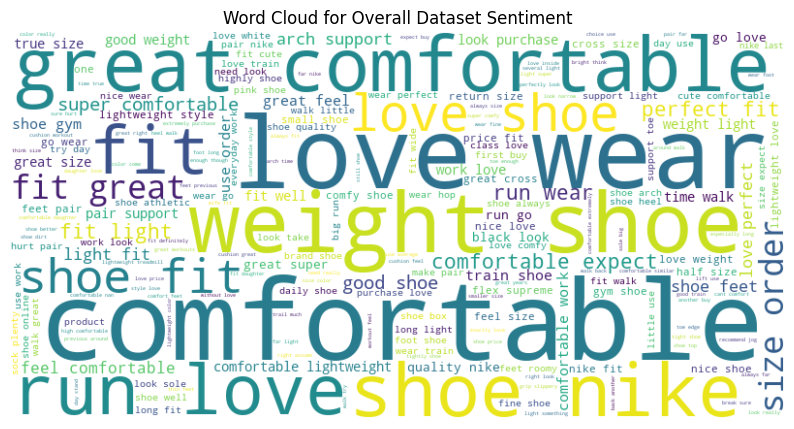

In [117]:


# next we create a new column for the vocabulary of each preprocessed message by spliting the words, tokenization
#Tokenization is the process of breaking up a sequence of strings into pieces such as words, keywords, phrases, symbols, 
#and other meaningful elements
df['Vocab'] = df['Cleaned_Message'].apply(lambda x: set(x.split()))

# next we create a new column to store the length of the vocabulary for each message for further analysis
df['Vocab_Len'] = df['Vocab'].apply(len)

#In order to create a word cloud to see what words most commonly used we will need to create a vocabulary by combining the vocab of all messages into
#a single list
all_vocab = []
for vocab_set in df['Vocab']:
    all_vocab.extend(list(vocab_set))

# Join all words into a single string,global text representation, useful for understanding overall vocabulary usage(word cloud)
text = ' '.join(all_vocab)

# Convert each set in the column to a string (for further processing, like vectorisation)
df['string'] = df['Vocab'].apply(lambda x: ' '.join(x))

# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Overall Dataset Sentiment')
plt.show()


In [91]:
print(df)

      overall  verified   reviewTime      reviewerID        asin  \
0           5      True   09 4, 2015   ALJ66O1Y6SLHA  B000K2PJ4K   
1           5      True   09 4, 2015   ALJ66O1Y6SLHA  B000K2PJ4K   
2           5      True   09 4, 2015   ALJ66O1Y6SLHA  B000K2PJ4K   
3           5      True   09 4, 2015   ALJ66O1Y6SLHA  B000K2PJ4K   
4           5      True   09 4, 2015   ALJ66O1Y6SLHA  B000K2PJ4K   
...       ...       ...          ...             ...         ...   
3171        5      True   07 2, 2018  A2077NII5H62R2  B005AGO4LU   
3172        5      True  06 28, 2018  A2IBS6PIPAGAB5  B005AGO4LU   
3173        5      True  06 25, 2018  A1GTC5EVSJNCQ8  B005AGO4LU   
3174        5      True  06 20, 2018  A311XHHLM12MUT  B005AGO4LU   
3175        5      True  06 16, 2018  A135SGOQMVWABQ  B005AGO4LU   

                                                  style     reviewerName  \
0      {'Size:': ' Big Boys', 'Color:': ' Blue/Orange'}         Tonya B.   
1     {'Size:': ' Big Boys', 'C

In [92]:
# Convert the list of words into a set to remove duplicates and count distinct words
distinct_word_count = len(set(all_vocab))

print("Number of distinct words in the vocabulary:", distinct_word_count)

Number of distinct words in the vocabulary: 1184


Top 40 Words and Their Counts:
shoe: 1387
comfortable: 967
love: 952
fit: 896
great: 568
wear: 545
size: 509
not: 459
like: 418
light: 408
look: 365
feet: 361
pair: 341
good: 341
run: 339
perfect: 319
support: 300
nike: 287
use: 272
buy: 259
color: 259
feel: 254
time: 254
weight: 250
nice: 243
really: 241
work: 235
get: 233
walk: 216
order: 215
expect: 208
train: 206
purchase: 203
go: 201
would: 198
lightweight: 192
up: 179
super: 178
need: 172
comfy: 171


C:\Users\Chan Wen Le\AppData\Local\Temp\ipykernel_1700\1083831917.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_40_word_counts, y=top_40_words_list, palette='viridis')


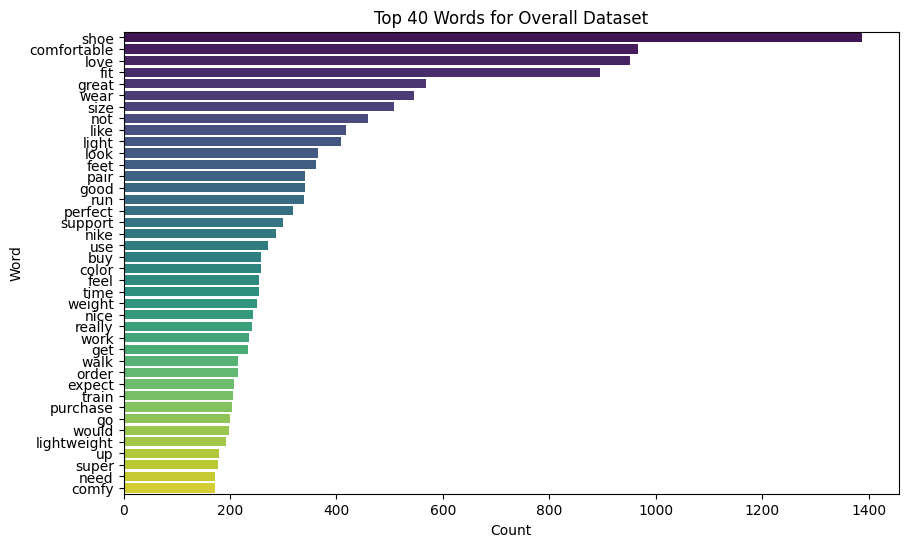

In [118]:
# Count the frequency of each word in the combined vocabulary
word_freq = Counter(all_vocab)

# Get the top 40 most common words and their frequencies
top_40_words = word_freq.most_common(40)

# Extract the words and their frequencies into separate lists
top_40_words_list = [word[0] for word in top_40_words]
top_40_word_counts = [word[1] for word in top_40_words]

# Print the top 40 words and their counts
print("Top 40 Words and Their Counts:")
for word, count in zip(top_40_words_list, top_40_word_counts):
    print(f"{word}: {count}")

# Plot the top 40 words and their counts
plt.figure(figsize=(10, 6))
sns.barplot(x=top_40_word_counts, y=top_40_words_list, palette='viridis')
plt.title('Top 40 Words for Overall Dataset')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

#### Question 1b(iii)
Sentiment analysis: Evaluate sentiment analysis on the review texts, visualize the distribution of sentiment, conclude the challenges and viable solutions to address these challenges in sentiment analysis for e-commerce platforms based on your findings (e.g., evaluate whether the sentimental findings are in agreement with their ratings). (word limit: 400)





In my analysis, I conducted sentiment analysis on the 'reviewText' column using Textblob and NLTK. This analysis aimed to evaluate whether the sentimental findings are in agreement with their ratings. Reviews with 'overall' scores of 1 and 2 are expected to exhibit negative sentiments, a score of 3 suggests a neutral sentiment, and scores of 4 and 5 are indicative of positive sentiments. Upon comparing the sentiment scores generated by both models against the 'overall' ratings, it was observed that NLTK's Vader model, with an accuracy of 81.23%, slightly outperformed Textblob, which had an accuracy of 79.22%. The sentiment score distributions for each model revealed a few notable differences: NLTK's scores were skewed towards positive sentiments, while Textblob's scores aligned more closely with a normal distribution. This pattern underscores a general positivity in the overall sentiments in the dataset.
    
The decision to prefer NLTK over Textblob was influenced by its higher correlation with the 'overall' scores, suggesting that NLTK is more adept at capturing the nuances behind the words.

The challenges encountered including the models' inability to perform optimally due to customer reviews containing subjective expressions or nuanced language, which complicates the accurate determination of sentiment. For instance, customers might post sarcasm or irony comments, leading to sentiment misinterpretation. Additionally, another issue arises from discrepancies when customers express a sentiment in their review text that contradicts the score they provide.

To address these challenges, it becomes essential to employ more sophisticated NLP models, such as BERT or GPT, which have a better understanding of context and can thus improve sentiment analysis accuracy. In the meantime, customer service representatives could engage with users to clarify their reviews or ratings whenever there is a significant discrepancy between the sentiment expressed and the rating given, ensuring higher data quality.


## Textblob Sentiment Analysis


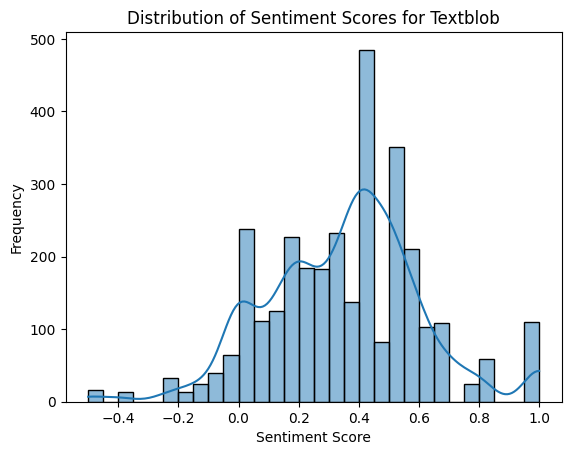

In [94]:
from textblob import TextBlob

# Apply sentiment analysis
df['Sentiment_Polarity'] = df['Cleaned_Message'].apply(lambda x: TextBlob(x).sentiment.polarity)


# Visualize the distribution of sentiment scores
sns.histplot(data=df, x='Sentiment_Polarity', bins=30, kde=True)
plt.title('Distribution of Sentiment Scores for Textblob')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [95]:
# Evaluate whether the sentimental findings are in agreement with their ratings.

# Function to categorize sentiment based on polarity
def categorize_sentiment(polarity):
    if polarity > 0.05:
        return 'positive'
    elif polarity < -0.05:
        return 'negative'
    else:
        return 'neutral'

# Categorize sentiment based on polarity
df['sentiment_category'] = df['Sentiment_Polarity'].apply(categorize_sentiment)

# Function to categorize ratings into sentiment categories
def categorize_rating(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:  # rating is 1 or 2
        return 'negative'

# Categorize ratings into sentiment categories
df['rating_category'] = df['overall'].apply(categorize_rating)

# Preview the updated dataframe
df[['overall', 'rating_category', 'Sentiment_Polarity', 'sentiment_category']].head()

,overall,rating_category,Sentiment_Polarity,sentiment_category
0,5,positive,0.8,positive
1,5,positive,0.8,positive
2,5,positive,0.8,positive
3,5,positive,0.8,positive
4,5,positive,0.8,positive


## Evaluating the performance of TextBlob

In [96]:
#Evaluating the performance of TextBlob
from sklearn.metrics import accuracy_score, classification_report

# Calculate overall agreement
agreement_percentage = accuracy_score(df['rating_category'], df['sentiment_category']) * 100

# Detailed classification metrics as a dictionary
classification_metrics_dict = classification_report(df['rating_category'], df['sentiment_category'], target_names=['negative', 'neutral', 'positive'], output_dict=True)

# Convert the classification metrics dictionary to a DataFrame for a tidy presentation
classification_metrics_df = pd.DataFrame(classification_metrics_dict).transpose()

# Round the numbers for a cleaner presentation
classification_metrics_df = classification_metrics_df.round(2)

# Display the overall agreement
print(f"Overall Agreement: {agreement_percentage:.2f}%")

# Display the classification metrics in table form
print("Classification Metrics:")
display(classification_metrics_df)
 


Overall Agreement: 79.22%
Classification Metrics:


,precision,recall,f1-score,support
negative,0.58,0.39,0.46,210.00
neutral,0.12,0.11,0.12,337.00
positive,0.88,0.91,0.89,2629.00
accuracy,0.79,0.79,0.79,0.79
macro avg,0.53,0.47,0.49,3176.00
weighted avg,0.78,0.79,0.78,3176.00


## NLTK Sentiment Analysis

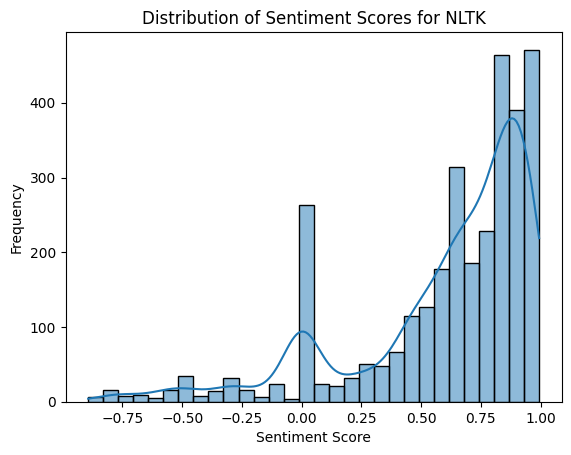

(NLTK_rating_sentiment
 positive    2629
 neutral      337
 negative     210
 Name: count, dtype: int64,
 {'positive': 82.77707808564232,
  'neutral': 10.610831234256928,
  'negative': 6.6120906801007555})

In [119]:
#NLTK Sentiment Intensity Analyser， Vader
from nltk.sentiment import SentimentIntensityAnalyzer

df_nltk = df.copy()


# Initialize the VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to categorize sentiment scores from VADER
def categorize_sentiment(score):
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to the reviewText column
df_nltk['NLTK_score'] = df_nltk['reviewText'].apply(lambda x: sia.polarity_scores(str(x)))

# Extract the compound score into a new column
df_nltk['compound'] = df_nltk['NLTK_score'].apply(lambda x: x['compound'])

# Visualize the distribution of sentiment scores
sns.histplot(data=df_nltk, x='compound', bins=30, kde=True)
plt.title('Distribution of Sentiment Scores for NLTK')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Converting the Vader compound score to category: positive, negative and neutral
df_nltk['NLTK_category'] = df_nltk['NLTK_score'].apply(categorize_sentiment)

# Map the overall ratings to sentiment categories
# Function to categorize ratings into sentiment categories
def categorize_rating(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:  # rating is 1 or 2
        return 'negative'


df_nltk['NLTK_rating_sentiment'] = df_nltk['overall'].apply(categorize_rating)

# Preview the updated dataframe
df_nltk[['overall', 'NLTK_rating_sentiment', 'compound', 'NLTK_category']].head()

# Now we can calculate the percentage of each sentiment
sentiment_percentages = df_nltk['NLTK_rating_sentiment'].value_counts(normalize=True) * 100

# Display the sentiment values and their percentages
df_nltk['NLTK_rating_sentiment'].value_counts(), sentiment_percentages.to_dict()

82.7% of reviews in NLTK are positive, 10.6% neutral, and 6.6% negative.

## Evaluating the performance of NLTK

In [98]:
#Evaluating the performance of NLTK

# Calculate overall agreement
agreement_percentage = accuracy_score(df_nltk['NLTK_rating_sentiment'], df_nltk['NLTK_category']) * 100

# Detailed classification metrics as a dictionary
classification_metrics_dict = classification_report(df_nltk['NLTK_rating_sentiment'], df_nltk['NLTK_category'], target_names=['negative', 'neutral', 'positive'], output_dict=True)

# Convert the classification metrics dictionary to a DataFrame for a tidy presentation
classification_metrics_df = pd.DataFrame(classification_metrics_dict).transpose()

# Round the numbers for a cleaner presentation
classification_metrics_df = classification_metrics_df.round(2)

# Display the overall agreement
print(f"Overall Agreement: {agreement_percentage:.2f}%")

# Display the classification metrics in table form
print("Classification Metrics:")
display(classification_metrics_df)
 


Overall Agreement: 81.23%
Classification Metrics:


,precision,recall,f1-score,support
negative,0.47,0.44,0.45,210.00
neutral,0.24,0.19,0.21,337.00
positive,0.89,0.92,0.91,2629.00
accuracy,0.81,0.81,0.81,0.81
macro avg,0.53,0.52,0.52,3176.00
weighted avg,0.80,0.81,0.80,3176.00


## Understanding the Style (Size and Colours) with Positive Sentiments

Filter a DataFrame to include only the rows where 'Sentiment_Polarity' is greater than 0.5 and 'overall' is either 4 or 5 as "filtered_df" .
Then extract the contents of the 'style' column for these filtered rows.

In [99]:
# Understanding the Size and Colours with Positive Sentiments

# Filter the DataFrame
filtered_df = df_nltk[(df_nltk['compound'] > 0.5) & (df_nltk['overall'].isin([4, 5]))].copy() 



In [100]:
# Understanding the Size and Colours with Positive Sentiments
from ast import literal_eval

# Function to convert string representation of dictionary to a dictionary
def convert_to_dict(style):
    if isinstance(style, str):
        try:
            return literal_eval(style)
        except (ValueError, SyntaxError):
            return None  # or a default value if parsing fails
    return style

# Apply the function to create the 'style_dict' column
filtered_df['style_dict'] = filtered_df['style'].apply(convert_to_dict)

# Extract 'Size' and 'Color' values

filtered_df['Size'] = filtered_df['style_dict'].apply(lambda x: x.get('Size:') if isinstance(x, dict) else None)
filtered_df['Color'] = filtered_df['style_dict'].apply(lambda x: x.get('Color:') if isinstance(x, dict) else None)

# Drop any rows that contain None values (if any conversion failed)
filtered_df.dropna(subset=['Size', 'Color'], inplace=True)

# Now 'Size' and 'Color' are in separate columns
print(filtered_df[['Size', 'Color']].head())
print(len(filtered_df))



        Size                          Color
0   Big Boys                    Blue/Orange
1   Big Boys   Black (37467610) / Red/White
2   Big Boys                 Blue/Gray Logo
3   Big Boys    Blue (37867638-99) / Yellow
4   Big Boys                      Blue/Pink
2098


In [101]:
# Group by 'Size' and 'Color', count occurrences, and sort in descending order
most_common_combinations = filtered_df.groupby(['Size', 'Color']).size().reset_index(name='Count').sort_values(by='Count', ascending=False)


# For Size
size_counts = filtered_df['Size'].value_counts()

# For Color
color_counts = filtered_df['Color'].value_counts()

# Display the top occurring sizes and colors
print("Top Sizes in Positive Sentiments:\n",size_counts.head(), "\n")
print("Top Colors in Positive Sentiments:\n", color_counts.head())



# Display the sorted list of most common size and color combinations
print('\n','The top 20 most positive sentiments combinations:','\n',most_common_combinations.iloc[0:20])

Top Sizes in Positive Sentiments:
 Size
8.5 B(M) US    259
9 B(M) US      251
7.5 B(M) US    227
8 B(M) US      211
9.5 B(M) US    164
Name: count, dtype: int64 

Top Colors in Positive Sentiments:
 Color
Black/White/Anthracite/Stealth                  854
Wolf Grey/Black-pink Blast/White                107
Hyper Jade/Mtlc Silver/Hyper Turq               104
Cool Grey / Volt - Wolf Grey - Pure Platinum     88
Grey                                             88
Name: count, dtype: int64

 The top 20 most positive sentiments combinations: 
              Size                                          Color  Count
94      8 B(M) US                 Black/White/Anthracite/Stealth    122
145     9 B(M) US                 Black/White/Anthracite/Stealth    120
113   8.5 B(M) US                 Black/White/Anthracite/Stealth    104
171   9.5 B(M) US                 Black/White/Anthracite/Stealth     96
75    7.5 B(M) US                 Black/White/Anthracite/Stealth     80
56      7 B(M) US      

## Understanding the Style (Size and Colours) with Negative Sentiments

Filter a DataFrame to include only the rows where 'Sentiment_Polarity' is lesser than -0.05 or 'overall' is either 1 or 2 as "filtered_df1" .
Then extract the contents of the 'style' column for these filtered rows.

In [102]:
# Understanding the Style (Size and Colours) with Negative Sentiments

# Filter the DataFrame
filtered_df1 = df_nltk[(df_nltk['compound'] < -0.05) | (df_nltk['overall'].isin([1, 2]))].copy() 


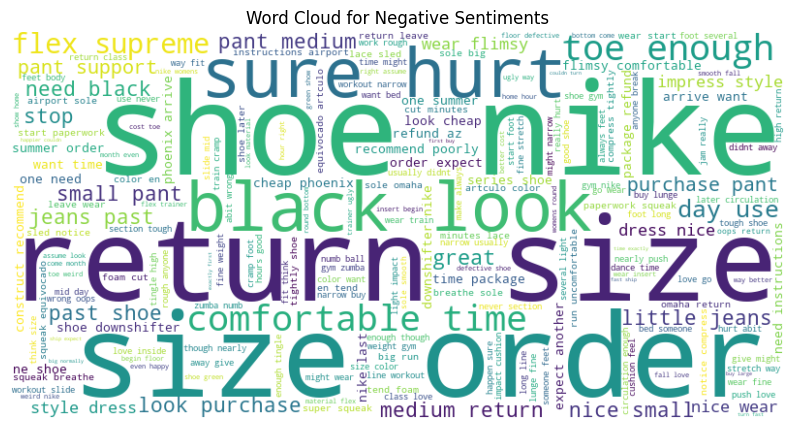

In [103]:
# Create a Negative Sentiment Word Cloud ( So sorry to mix this at question b(iii), this is due to I am using the result
# generated out from the sentiment analyzer, Vader to filter out relevant data rows
all_vocab1 = []
for vocab_set in filtered_df1['Vocab']:
    all_vocab1.extend(list(vocab_set))

# Join all words into a single string
text1 = ' '.join(all_vocab1)

# Create the WordCloud object
wordcloud1 = WordCloud(width=800, height=400, background_color='white').generate(text1)

# Plot the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Sentiments')
plt.show()


Top 40 Words in Negative Sentiments:
shoe: 138
not: 105
return: 82
nike: 72
size: 65
wear: 61
order: 50
time: 48
sole: 48
feet: 42
love: 42
fit: 41
hurt: 40
look: 37
comfortable: 37
one: 34
get: 33
fine: 32
don't: 32
buy: 32
come: 32
way: 29
large: 29
like: 29
big: 28
sure: 28
expect: 28
pair: 27
no: 26
pant: 25
make: 25
need: 24
would: 24
start: 24
run: 24
color: 24
enough: 24
long: 24
toe: 24
go: 24


C:\Users\Chan Wen Le\AppData\Local\Temp\ipykernel_1700\427427990.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_40_word_counts, y=top_40_words_list, palette='viridis')


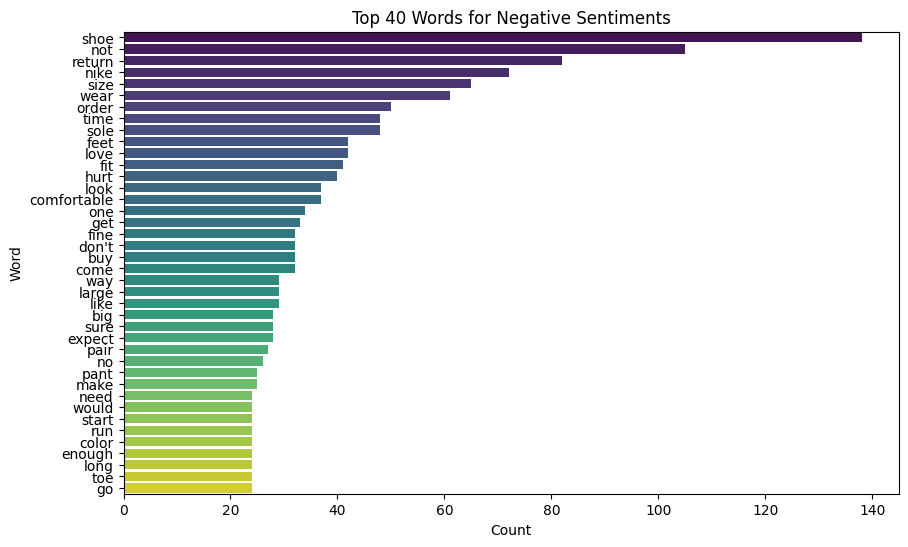

In [104]:

# Count the frequency of each word in the combined vocabulary
word_freq = Counter(all_vocab1)

# Get the top 40 most common words and their frequencies
top_40_words = word_freq.most_common(40)

# Extract the words and their frequencies into separate lists
top_40_words_list = [word[0] for word in top_40_words]
top_40_word_counts = [word[1] for word in top_40_words]

# Print the top 40 words and their counts
print("Top 40 Words in Negative Sentiments:")
for word, count in zip(top_40_words_list, top_40_word_counts):
    print(f"{word}: {count}")

# Plot the top 40 words and their counts
plt.figure(figsize=(10, 6))
sns.barplot(x=top_40_word_counts, y=top_40_words_list, palette='viridis')
plt.title('Top 40 Words for Negative Sentiments')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

In [105]:
# Back on track to check the size and colour associate with negative sentiments

# Function to convert string representation of dictionary to a dictionary
def convert_to_dict(style):
    if isinstance(style, str):
        try:
            return literal_eval(style)
        except (ValueError, SyntaxError):
            return None  # or a default value if parsing fails
    return style

# Apply the function to create the 'style_dict' column
filtered_df1['style_dict'] = filtered_df1['style'].apply(convert_to_dict)

# Extract 'Size' and 'Color' values

filtered_df1['Size'] = filtered_df1['style_dict'].apply(lambda x: x.get('Size:') if isinstance(x, dict) else None)
filtered_df1['Color'] = filtered_df1['style_dict'].apply(lambda x: x.get('Color:') if isinstance(x, dict) else None)

# Drop any rows that contain None values (if any conversion failed)
filtered_df1.dropna(subset=['Size', 'Color'], inplace=True)

# Now 'Size' and 'Color' are in separate columns
print(filtered_df1[['Size', 'Color']].head())
print(len(filtered_df1))


        Size              Color
24   X-Large   Charcoal Heather
27   X-Large               Navy
29   X-Large   Charcoal Heather
34    Medium              Black
35    Medium              Black
291


In [106]:
# Group by 'Size' and 'Color', count occurrences, and sort in descending order
most_common_combinations1 = filtered_df1.groupby(['Size', 'Color']).size().reset_index(name='Count').sort_values(by='Count', ascending=False)


# For Size
size_counts = filtered_df1['Size'].value_counts()

# For Color
color_counts = filtered_df1['Color'].value_counts()

# Display the top occurring sizes and colors
print("Top Sizes in Negative Sentiments:\n",size_counts.head(), "\n")
print("Top Colors in Negative Sentiments:\n", color_counts.head())



# Display the sorted list of most common size and color combinations
print('\n','The top 20 most negative sentiments combinations:','\n',most_common_combinations1.iloc[0:20])

Top Sizes in Negative Sentiments:
 Size
8.5 B(M) US    36
9.5 B(M) US    27
10 B(M) US     24
9 B(M) US      22
7.5 B(M) US    20
Name: count, dtype: int64 

Top Colors in Negative Sentiments:
 Color
Black/White/Anthracite/Stealth                  80
Cool Grey/Volt/Pure Platinum                    32
Cool Grey / Volt - Wolf Grey - Pure Platinum    16
Cool Grey/Pure Platinum/White/Volt              16
Black/Wolf Grey/White/Pink                      16
Name: count, dtype: int64

 The top 20 most negative sentiments combinations: 
             Size                                          Color  Count
31   8.5 B(M) US                 Black/White/Anthracite/Stealth     24
38     9 B(M) US                 Black/White/Anthracite/Stealth     16
49        Medium                                          Black     12
45   9.5 B(M) US               Wolf Grey/Platinum/White/Crimson     12
24   7.5 B(M) US                   Cool Grey/Volt/Pure Platinum     12
1     10 B(M) US             Cool Grey/

#### Question 1b(iv)
Named Entity Recognition (NER): Demonstrate the application of NER in review analysis, investigate the importance of NER in extracting key information for review analysis, select examples of entities that are relevant in an e-commerce setting and explain how businesses can benefit from NER. (word limit: 500)

In e-commerce, reviews are rich with insights about customer experiences, product features, and service quality. By applying Spacy, businesses can extract structured information to identify common themes and issues.

The provided graph shows a predominance of 'CARDINAL' entities, typically numeric data that could relate to product sizes, quantities, or frequency of use mentioned in customer reviews. These insights could inform stock management decisions and help anticipate customer needs. 'ORG'  are another entity which deserve the attention, it highlights the brand mentions which are invaluable for measuring brand visibility and perception in the market. Brands like 'Nike' are prominently mentioned, indicating significant customer engagement that could drive strategic marketing campaigns.

'CARDINAL' terms such as 'half' or specific numbers may inform businesses about prevalent customer preferences or sizing issues. Meanwhile, the frequent citation of 'Nike' and similar 'supreme tr' entities could signal which brands are top-of-mind for consumers, guiding competitive strategy and brand positioning.

The presence of 'DATE' entities might reflect on the usage patterns, durability of products or customer experiences. For instance, frequent references to "several years" or "daily" suggest the usage patterns or durability of product, informing potential promotional narratives or product improvement strategies.

In harnessing NER for extracting such entities, businesses achieve a more efficient synthesis of vast customer feedback, converting unstructured data into actionable insights. This not only streamlines the review analysis process but also furnishes a data-driven foundation for enhancing product development, customer service, and strategic planning.


In [107]:
import spacy
from collections import Counter
import matplotlib.pyplot as plt

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

In [108]:
# Function to extract named entities from text
def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

# Apply NER to each review text in the DataFrame
df['entities'] = df['Cleaned_Message'].apply(extract_entities)

# Flatten the list of entities
entities_list = [ent for ents in df['entities'] for ent in ents]

# Count the frequency of each entity type
entity_counts = Counter([ent[1] for ent in entities_list])


########
# Print the most common entities
print("Most common entities:")
for entity, count in entity_counts.most_common(10):
    print(f"{entity}: {count}")

# Now, to find the top 5 occurrences for 'CARDINAL', 'ORG', and 'DATE':
# Filter entities by type
cardinal_entities = [ent[0] for ent in entities_list if ent[1] == 'CARDINAL']
org_entities = [ent[0] for ent in entities_list if ent[1] == 'ORG']
date_entities = [ent[0] for ent in entities_list if ent[1] == 'DATE']


# Count occurrences for each type
cardinal_counts = Counter(cardinal_entities).most_common(10)
org_counts = Counter(org_entities).most_common(10)
date_counts = Counter(date_entities).most_common(10)


print("\nTop 10 'CARDINAL' entities:")
for entity, count in cardinal_counts:
    print(f"{entity}: {count}")

print("\nTop 10 'ORG' entities:")
for entity, count in org_counts:
    print(f"{entity}: {count}")

print("\nTop 10 'DATE' entities:")
for entity, count in date_counts:
    print(f"{entity}: {count}")





Most common entities:
CARDINAL: 850
DATE: 336
ORDINAL: 232
ORG: 130
QUANTITY: 71
PERSON: 70
TIME: 70
GPE: 16
LOC: 8
LAW: 8

Top 10 'CARDINAL' entities:
half: 109
one: 96
two: 69
1 2: 64
8: 57
9: 49
6: 34
10: 32
5: 32
8 5: 24

Top 10 'ORG' entities:
nike: 24
supreme tr: 16
straight box shoe: 8
hiit workouts purchase shoe: 8
phoenix: 8
walt disney: 8
un: 8
quick tranasaction love: 8
boot camp cross: 8
super comfortable join cross fit perfect shoe: 8

Top 10 'DATE' entities:
daily: 32
today: 16
several years: 16
8 5: 16
couple months: 16
first day: 16
2 years: 15
3 4 time week: 8
2 weeks: 8
15 years ago: 8


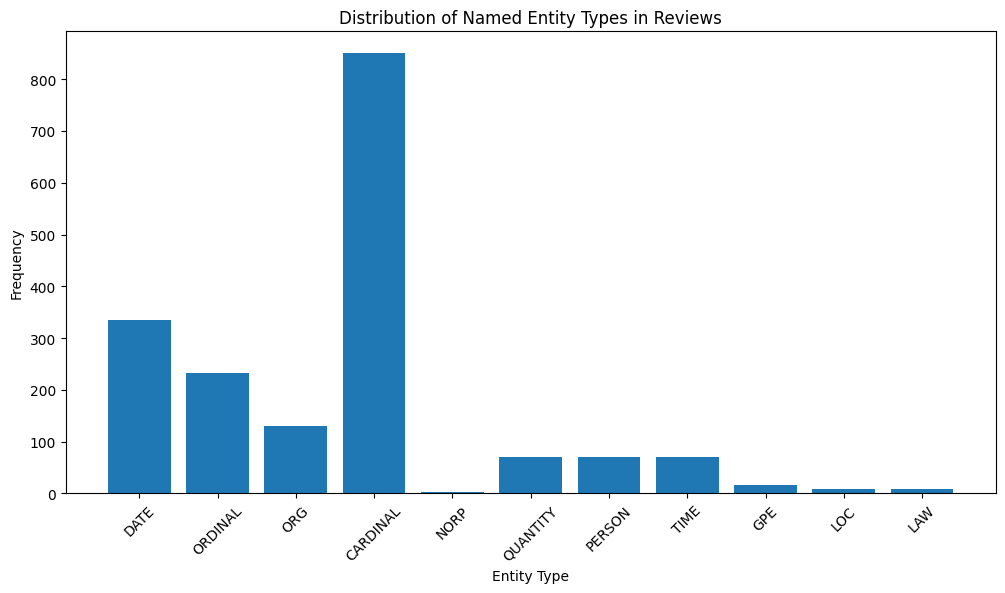

Most common entities:
CARDINAL: 850
DATE: 336
ORDINAL: 232
ORG: 130
QUANTITY: 71
PERSON: 70
TIME: 70
GPE: 16
LOC: 8
LAW: 8


In [109]:
# Plot the distribution of entity types
plt.figure(figsize=(12, 6))
plt.bar(entity_counts.keys(), entity_counts.values())
plt.xlabel('Entity Type')
plt.ylabel('Frequency')
plt.title('Distribution of Named Entity Types in Reviews')
plt.xticks(rotation=45)  # Rotate x-axis labels to 45 degrees
plt.show()

# Print the most common entities
print("Most common entities:")
for entity, count in entity_counts.most_common(10):
    print(f"{entity}: {count}")

In [110]:
# Apply NER to each review text in the DataFrame
filtered_df1['entities'] = filtered_df1['Cleaned_Message'].apply(extract_entities)

# Flatten the list of entities
entities_list = [ent for ents in filtered_df1['entities'] for ent in ents]

# Count the frequency of each entity type
entity_counts = Counter([ent[1] for ent in entities_list])


########
# Print the most common entities
print("Most common entities:")
for entity, count in entity_counts.most_common(10):
    print(f"{entity}: {count}")

# Now, to find the top 5 occurrences for 'CARDINAL', 'ORG', and 'DATE':
# Filter entities by type
cardinal_entities = [ent[0] for ent in entities_list if ent[1] == 'CARDINAL']
org_entities = [ent[0] for ent in entities_list if ent[1] == 'ORG']
date_entities = [ent[0] for ent in entities_list if ent[1] == 'DATE']


# Count occurrences for each type
cardinal_counts = Counter(cardinal_entities).most_common(10)
org_counts = Counter(org_entities).most_common(10)
date_counts = Counter(date_entities).most_common(10)


print("\nTop 10 'CARDINAL' entities:")
for entity, count in cardinal_counts:
    print(f"{entity}: {count}")

print("\nTop 10 'ORG' entities:")
for entity, count in org_counts:
    print(f"{entity}: {count}")

print("\nTop 10 'DATE' entities:")
for entity, count in date_counts:
    print(f"{entity}: {count}")

Most common entities:
CARDINAL: 124
ORDINAL: 48
DATE: 48
ORG: 32
TIME: 24
GPE: 8
PERSON: 8
QUANTITY: 8

Top 10 'CARDINAL' entities:
one: 32
8: 16
1 2: 16
9: 16
6: 8
7 5: 8
2 3: 8
seven: 8
30: 8
four: 4

Top 10 'ORG' entities:
phoenix: 8
nike: 8
supreme tr3: 8
supreme: 8

Top 10 'DATE' entities:
less week: 8
4 days ago: 8
daily: 8
two days row: 8
today: 8
every day: 8


#### Question 1b(v)
Topic modeling: Assess topic modeling techniques on the sub-dataset you selected and evaluate how business can use topic modeling to categorize and understand the major themes within customer reviews. (word limit: 500)

## LDA conducting for overall dataset

In [111]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np



# Vectorization
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['string'])

# Topic Modeling with LDA
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(X)

# Display the top words for each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, vectorizer.get_feature_names_out(), no_top_words)

Topic 0:
love shoe comfortable great light fit look weight support wear
Topic 1:
shoe fit comfortable perfect wear good not pair size feet
Topic 2:
size shoe comfortable not order like wear use up buy


## Hyperparameter Tuning using GridSearch CV for overall dataset

In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer


# Vectorization
vectorizer = CountVectorizer() 
X = vectorizer.fit_transform(df['string'])

# Setup LDA
lda = LatentDirichletAllocation(random_state=42)

# Define Search Param
search_params = {'n_components': [1,2,3,4,5,10], 'learning_decay': [.5, .7, .9]}


# Init the Model
lda_gridsearch = GridSearchCV(lda, param_grid=search_params, n_jobs=-1, cv=5)

# Do the Grid Search
lda_gridsearch.fit(X)

# Best Model
best_lda_model = lda_gridsearch.best_estimator_

# Model Parameters
print("Best Model's Params: ", lda_gridsearch.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", lda_gridsearch.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(X))

# Best number of topics
n_components = lda_gridsearch.best_params_['n_components']

# Display the top words for each topic for the best model
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(best_lda_model, vectorizer.get_feature_names_out(), 10)



Best Model's Params:  {'learning_decay': 0.5, 'n_components': 1}
Best Log Likelihood Score:  -45854.21780064595
Model Perplexity:  416.1258736832325
Topic 0:
shoe comfortable love fit great wear size not like light


## LDA conducting for negative dataset

In [113]:

# Vectorization
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(filtered_df1['string'])

# Topic Modeling with LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Display the top words for each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, vectorizer.get_feature_names_out(), no_top_words)

Topic 0:
size return wrong not order pant definitely true fit run
Topic 1:
hurt however store shoe amazon think pair get great no
Topic 2:
nike shoe not return look like toe flex feet time
Topic 3:
shoe sole wear size fit one big no defective always
Topic 4:
not shoe get big buy comfortable workout sole sure size


## Hyperparameter Tuning using GridSearch CV for Negative Dataset

In [114]:
# Vectorization
vectorizer = CountVectorizer()  # Use your custom tokenizer here if needed
X = vectorizer.fit_transform(filtered_df1['string'])

# Setup LDA
lda = LatentDirichletAllocation(random_state=42)

# Define Search Param
search_params = {'n_components': [1,2,3,4,5,10], 'learning_decay': [.5, .7, .9]}


# Init the Model
lda_gridsearch = GridSearchCV(lda, param_grid=search_params, n_jobs=-1, cv=5)

# Do the Grid Search
lda_gridsearch.fit(X)

# Best Model
best_lda_model = lda_gridsearch.best_estimator_

# Model Parameters
print("Best Model's Params: ", lda_gridsearch.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", lda_gridsearch.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(X))

# Best number of topics
n_components = lda_gridsearch.best_params_['n_components']

# Display the top words for each topic for the best model
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(best_lda_model, vectorizer.get_feature_names_out(), 10)

Best Model's Params:  {'learning_decay': 0.5, 'n_components': 1}
Best Log Likelihood Score:  -4999.181353075509
Model Perplexity:  280.31222394387134
Topic 0:
shoe not return nike size wear sole time order love


## TFIDF with NMF for dataset

In [115]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['string'])

# Topic Modeling with NMF
nmf = NMF(n_components=5, random_state=42)
nmf.fit(X)

# Display the top words for each topic
def display_topics_nmf(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics_nmf(nmf, vectorizer.get_feature_names_out(), no_top_words)

Topic 0:
comfortable light weight fit cute expect super size extremely lightweight
Topic 1:
love daughter shoe color fit super light gift wife comfy
Topic 2:
perfect fit expect size good always true daughter highly extremely
Topic 3:
nice shoe fit expect look product good gift wide comfy
Topic 4:
great shoe look good support pair like not wear feet


## Negative Sentiment

In [116]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(filtered_df1['string'])

# Topic Modeling with NMF
nmf = NMF(n_components=5, random_state=42)
nmf.fit(X)

# Display the top words for each topic
def display_topics_nmf(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics_nmf(nmf, vectorizer.get_feature_names_out(), no_top_words)

Topic 0:
big large size buy run sole wear fit comfortable true
Topic 1:
wrong order oops size return shoe perfect box definitely right
Topic 2:
look cheap flex nice pant return support supreme toe black
Topic 3:
nike always shoe long hurt would good hours break feet
Topic 4:
color expect orange red keep go en artculo equivocado sure
